# COGS 108 - Noodle Numbers 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Overview

Instant ramen is a well-known, staple college food. We decided to investigate the popularity behind instant ramen brands and if there are any aspects outside of their flavor that make them comparable to others. After some research and data analysis of a data set with 3000+ obervations, we found that the amount of ramen brands a country produces does not relate to the popularity of those products, and there is no strong corrlation between ramen style and rating. 

# Names

- Alan Apte
- Zihang Xu
- Carlos Martinez
- Lam Nghiem
- Rainee Pei

<a id='research_question'></a>
# Research Question

What affects the popularity of instant ramen brands/companies?

<a id='background'></a>

## Background & Prior Work

*Instant ramen is a quick and inexpensive version of a Japanese noodle dish. It has become increasingly popular in the US through social media trends, especially from spicy ramen challenges. We wanted to look into this trend, and how it has expanded since then. Being college students who are dependent on instant ramen for our daily food consumption, we are very familiar with the basic process of making instant ramen, and the many varieties it comes in. Since they are such a big part of our diet, we began to wonder what influences people’s decisions to buy certain instant ramen brands.*

*When looking at the many types of instant ramen brands, we noticed that they often come in a variety of colorful packages with the end product featured on the front. After doing a bit of research, we couldn’t find much on instant ramen marketing itself, but we started looking into food marketing in general. According to “The Effect of Packaging Color and Health Claims on Product Attitude and Buying Intention”, packaging itself does not contribute very much to purchasing rate. However, there was a relationship between the customer's intentions for purchasing and purchasing rate. Positive attitudes towards products led to higher customer intention for purchasing. In addition to this, “the most  important factors [in] determining the behavior of buyers in the food market are the sensory characteristics, nutritional value and price” as stated in “Consumer Behavior at the Food Market”. In other words, visual imagery is not the only factor that contributes to product purchasing rate. These buying patterns of customers when it comes to food can be applied to the popularity of instant ramen brands as well. Price, perceived quality, and customer intentions/attitudes could be possible factors that affect instant ramen popularity, which we hope to look into more in this project.*

References (include links):
- 1)We found an interesting dataset about instant ramen, and we wanted to look into that topic more. https://www.kaggle.com/samuelvedrik/ramen-ratings-latest-update-jan-25-2020 https://www.kaggle.com/residentmario/ramen-ratings 
- 2)We were curious about how ramen has become popular. https://timeline.com/ramen-path-global-domination-b4d9831dbce 
- 3)Review on worst ramen https://towardsdatascience.com/the-worst-ramen-in-the-world-learn-eda-in-python-with-ramen-rating-3cf3b608252a  
- 4)Research on food marketing and packaging , and whether or not they influence purchasing rate https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7142868/   
- 5)History on Instant Ramen https://scholarblogs.emory.edu/noodlenarratives/2019/08/10/young-cho-history-forms-and-impact-of-instant-noodles-in-japan-south-korea-and-china/    
- 6)Consumer behavior research https://www.researchgate.net/publication/258889655_CONSUMER_BEHAVIOUR_AT_THE_FOOD_MARKET 


# Hypothesis


*We predict that spicy instant ramen in packs from Japan will have the highest rating. Ramen originated from Japan so we think it’ll be more popular since it is considered more “authentic”. Can buy a higher quantity of ramen if stored in packs since it’s more condensed compared to cups. We think people like spicy ramen better since it has become a trend and expands our palette (exciting).*

# Dataset(s)

**Dataset 1**

Dataset Name: Ramen Ratings

Link to the dataset: https://www.kaggle.com/samuelvedrik/ramen-ratings-latest-update-jan-25-2020

Number of observations: 3473

The dataset has 7 columns: ID, URL, Brand, Variety, Style, Country, and Stars. The features we will likely focus on are Brand, Variety, Style, Country, and Stars. This was really the only pertinent dataset we found that could help answer our research question.

# Setup

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.probability import FreqDist

import string

from nltk.stem import PorterStemmer

# Data Cleaning


The data looks fairly clean already besides a few unusable inputs for ratings. One of the ramens listed had a rating of “NS”, which we decided to remove the entire row from the dataset. All the brand names were consistent with each other, so we didn’t have to rewrite them so that they were formatted in the same way. We removed the “URL” column because we are not planning to use that data for this project. Ultimately, we didn’t do very much to the dataset because most of the ratings were already in numerical values, and object values for other columns had consistent types.

We tokenized, removed stop words and stemmed the 'Variety' column. Then, applied those changes to the dataframe for later analysis.

In [12]:
#import dataset
df = pd.read_csv('ramen ratings.csv')

#remove URL column
df = df[['ID', 'Brand', 'Variety', 'Style', 'Country', 'Stars']]

#make sure all ratings in 'Stars' column are numerical values (float64)
#drop rows without numerical rating in 'Stars' column
df = df[pd.to_numeric(df['Stars'], errors='coerce').notnull()]
df['Stars'] = df['Stars'].astype(float)

#replace flavour with flavor
def standardize_flavor(string):
    string = string.lower()
    string = string.strip()
    
    output = string.replace('flavour', 'flavor')
    
    return output

df['Variety'] = df['Variety'].apply(standardize_flavor)

#tokenize and stop words
x = df.loc[:, 'Variety']
sentence=' '.join(x)
tokenized_word = word_tokenize(sentence)
df['Variety'] = df['Variety'].apply(word_tokenize)

stop_words = stopwords.words('english')
newStopWords = ['(',')','-','_',':','&']
stop_words.extend(newStopWords)

tokenized_word
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)

#stemming
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

df['Variety'] = df['Variety'].apply(lambda x: [ps.stem(y) for y in x])

#apply stop words
df['Variety'] = df['Variety'].apply(lambda x: [item for item in x if item not in stop_words])



# Data Analysis & Results

For the following data analysis, we employed a few approaches in order to effectively visualize the data we gathered and cleaned.
For the “Variety” variable of the data, we used term frequency to find out if there were any words in the names of the instant ramen brands that showed up more than others. For this, we tokenized, removed stop words, and stemmed the “Variety” column. We then graphed the data using a frequency distribution using a line graph which allowed us to see differences in the frequency of a word in comparison to others.
In addition to this, we individually compared the columns “Country”, “Style”, and “Brand” to “Stars”. For “Country” and “Brand”, there were many cases where there were only a few observations for a single country or brand. We removed any country or brand that had less than five observations in order to have a more accurately proportioned graph when comparing “Country” or “Brand” to “Stars”. Then, we used bar graphs to visualize the data because we would be able to see the differing star value counts for each variable. We also chose to graph the data in descending order, so it would be easier to distinguish. For both bar graphs, we plotted the average number of stars with either “Country” or “Brand” (average number of stars of each country’s ramen / average number of stars of each brand).

**Word Frequency Analysis: "Variety"**

Observing which words are used the most when it comes to naming ramen products

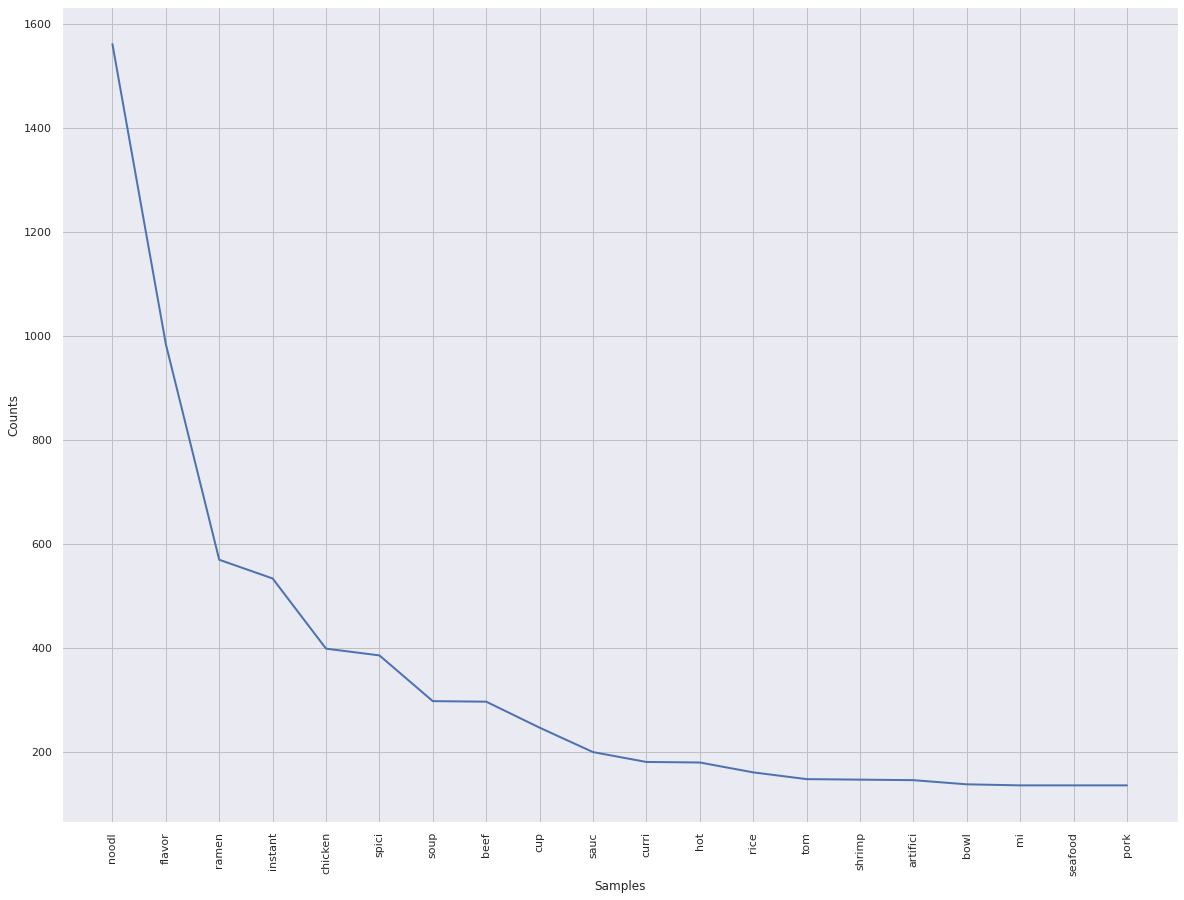

In [13]:
variety = df['Variety'].apply(pd.Series).stack()

# calculation word frequency
fdist_variety = FreqDist(variety)

# Frequency Distribution Plot - top 20
# for words in variety
fdist_variety.plot(20, cumulative=False);

sns.set(rc={'figure.figsize':(8,5)})

**Analysis and Results:**

The marketed titles or “Variety” for most ramen brands revolve around the flavor or style, so ramen brands tend to use descriptive words when naming their products. In terms of flavor, the words chicken and spicy seem to be two of the most frequently used words. We believe this is the case since these flavor profiles seem to appeal most to the average consumer and brands believe having these flavors available is profitable marketing and will increase consumption.Besides flavor, other frequently used words in ramen marketing are noodle, flavor, ramen, and instant. These words reiterate what the product is, and may offer more appeal to consumers. For example, seeing the word “instant” on a ramen pack may influence consumers to purchase it since it implies convenience to cook. Additionally, words like “noodle” and “ramen” reiterates to consumers what they are buying.

**Country VS. Stars**

Testing to see if there is a relationship between amount of ramen products a country makes and the average star ratings for that country

In [15]:
#Country vs Stars
print(df['Country'].unique())
#standardizing country names
df['Country'] = df['Country'].replace('USA', 'United States')
df['Country'] = df['Country'].replace('UK', 'United Kingdom')
df['Country'] = df['Country'].replace('Souh Korea', 'South Korea')
print(df['Country'].unique())

#get one country has how many types of ramens and store to new col named count
df['count'] = df.groupby('Country')['Country'].transform('count')

#only keep countries have more than 5 types of ramens
#because if a country only has 1 ramen and it has a very high rating, the rate could be biased
df = df[df['count']> 5]
countries = df.groupby("Country")

#get avg rate for the rest countries
avgStars = countries['Stars'].agg(np.mean)

#create a new df store countries and their avg rating
starsArr = avgStars.array
starDf = pd.DataFrame(starsArr)
countryRatings = pd.DataFrame(sorted(df['Country'].unique()), columns=['Country'])
countryRatings['Stars'] = starDf
countryRatings.head()


['Malaysia' 'Taiwan' 'Japan' 'United States' 'Thailand' 'Indonesia'
 'South Korea' 'China' 'Singapore' 'Hong Kong' 'Brazil' 'Vietnam' 'Mexico'
 'Canada' 'United Kingdom' 'Philippines' 'Bangladesh' 'Australia'
 'Netherlands' 'Poland' 'Germany' 'India' 'Hungary' 'Pakistan' 'Nepal'
 'Myanmar' 'Colombia']
['Malaysia' 'Taiwan' 'Japan' 'United States' 'Thailand' 'Indonesia'
 'South Korea' 'China' 'Singapore' 'Hong Kong' 'Brazil' 'Vietnam' 'Mexico'
 'Canada' 'United Kingdom' 'Philippines' 'Bangladesh' 'Australia'
 'Netherlands' 'Poland' 'Germany' 'India' 'Hungary' 'Pakistan' 'Nepal'
 'Myanmar' 'Colombia']


Country     Stars
0   Australia  3.260000
1  Bangladesh  3.479167
2      Brazil  3.678571
3      Canada  2.330357
4       China  3.462896

In [16]:
#Top 5 countries with highest rated ramen on average
topCountry = countryRatings.sort_values(by ='Stars', ascending=False)
topCountry.head()

Country     Stars
12   Malaysia  4.185385
20  Singapore  4.114964
10  Indonesia  4.113636
14    Myanmar  3.946429
11      Japan  3.909944

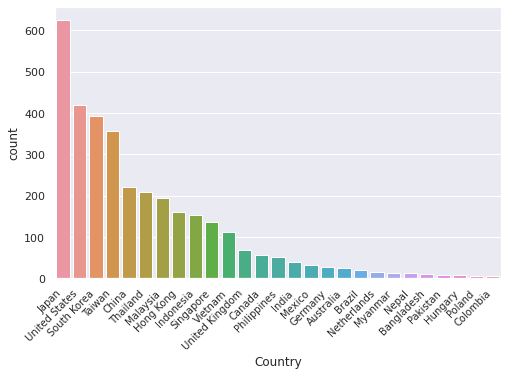

In [17]:
#plotting countries and their number of ramen in decending order
countryCount = sns.countplot(x= 'Country', data = df, order = df['Country'].value_counts().index)
countryCount.set_xticklabels(countryCount.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize = 10)
sns.set(rc={'figure.figsize':(20,15)})

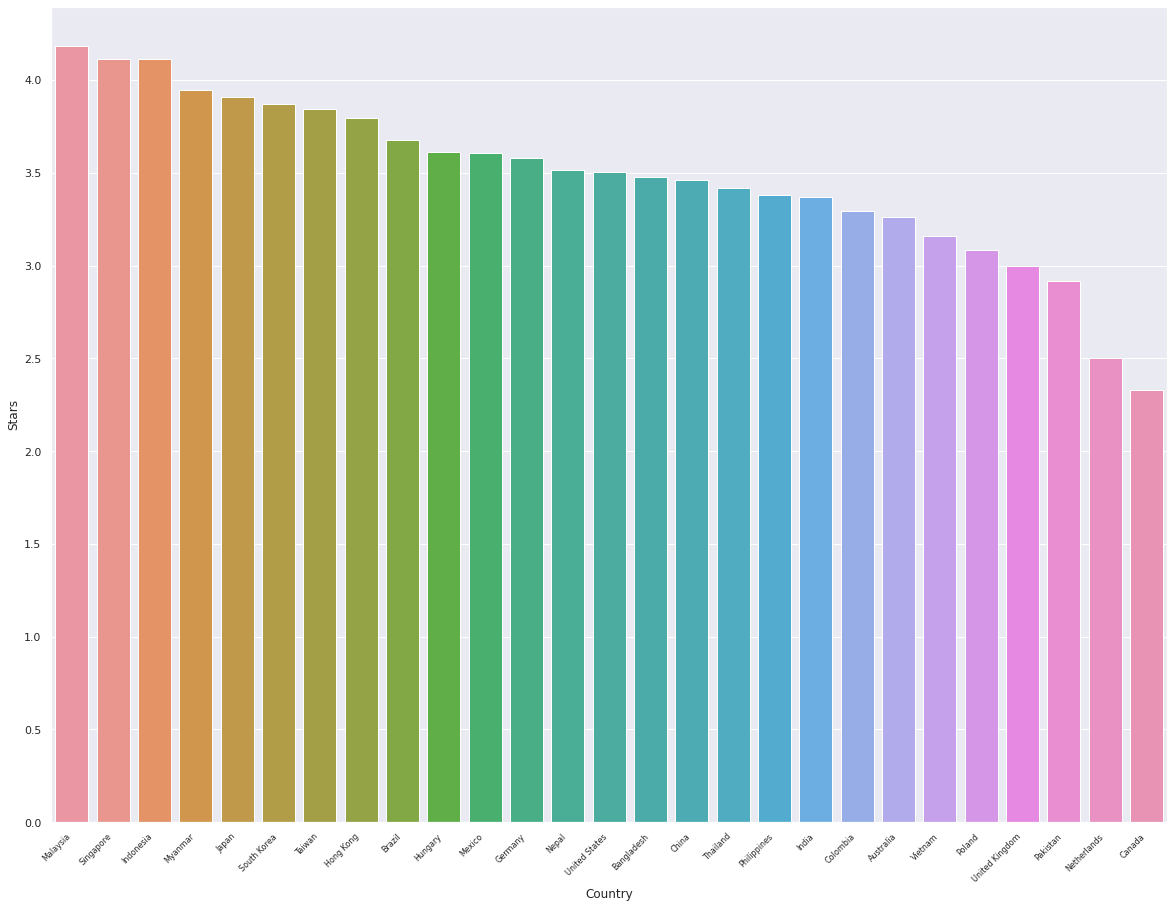

In [18]:
#plotting countries and their avg rating in decending order
CountryStars = sns.barplot(x= 'Country', y= 'Stars', data = countryRatings, order=countryRatings.sort_values('Stars',ascending = False).Country)
CountryStars.set_xticklabels(CountryStars.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize = 8)
sns.set(rc={'figure.figsize':(20,15)})

**Analysis and Resutls:**

The most popular ramens are from Asia, more specifically, Malaysia. Even though the country that had the most observations were from Japan, Malaysia had the highest average rating with half the amount of observations. The top three countries with the most observations or different ramen products (Japan, United States, and South Korea) all averaged below 4 stars. The more ramen products a country produces does not relate to the popularity of those ramen products. 

**Style VS. Stars**

Testing to see if there are any preferences in ramen styles, measured by star ratings

In [22]:
#Style vs Stars
print(df['Style'].unique())
countries = df.groupby("Style")

#Bar was only used once and meant pack
df['Style'] = df['Style'].replace('Bar', 'Pack')
print(df['Style'].unique())

#get avg rating for each styles
avgStars = countries['Stars'].agg(np.mean)
starsArr = avgStars.array

#create a new df store styles and their avg rating
starDf = pd.DataFrame(starsArr)
styleRatings = pd.DataFrame(sorted(df['Style'].unique()), columns=['Style'])
styleRatings['Stars'] = starDf
styleRatings.head()

['Pack' 'Tray' 'Bowl' 'Cup' 'Box' 'Restaurant' 'Can']
['Pack' 'Tray' 'Bowl' 'Cup' 'Box' 'Restaurant' 'Can']


Style     Stars
0  Bowl  3.708644
1   Box  4.392857
2   Can  3.500000
3   Cup  3.468802
4  Pack  3.772995

In [23]:
#Top 5 styles with the highest ratings on average
topStyle = styleRatings.sort_values(by ='Stars', ascending=False)
topStyle.head()

Style     Stars
1         Box  4.392857
4        Pack  3.772995
0        Bowl  3.708644
5  Restaurant  3.583333
6        Tray  3.550481

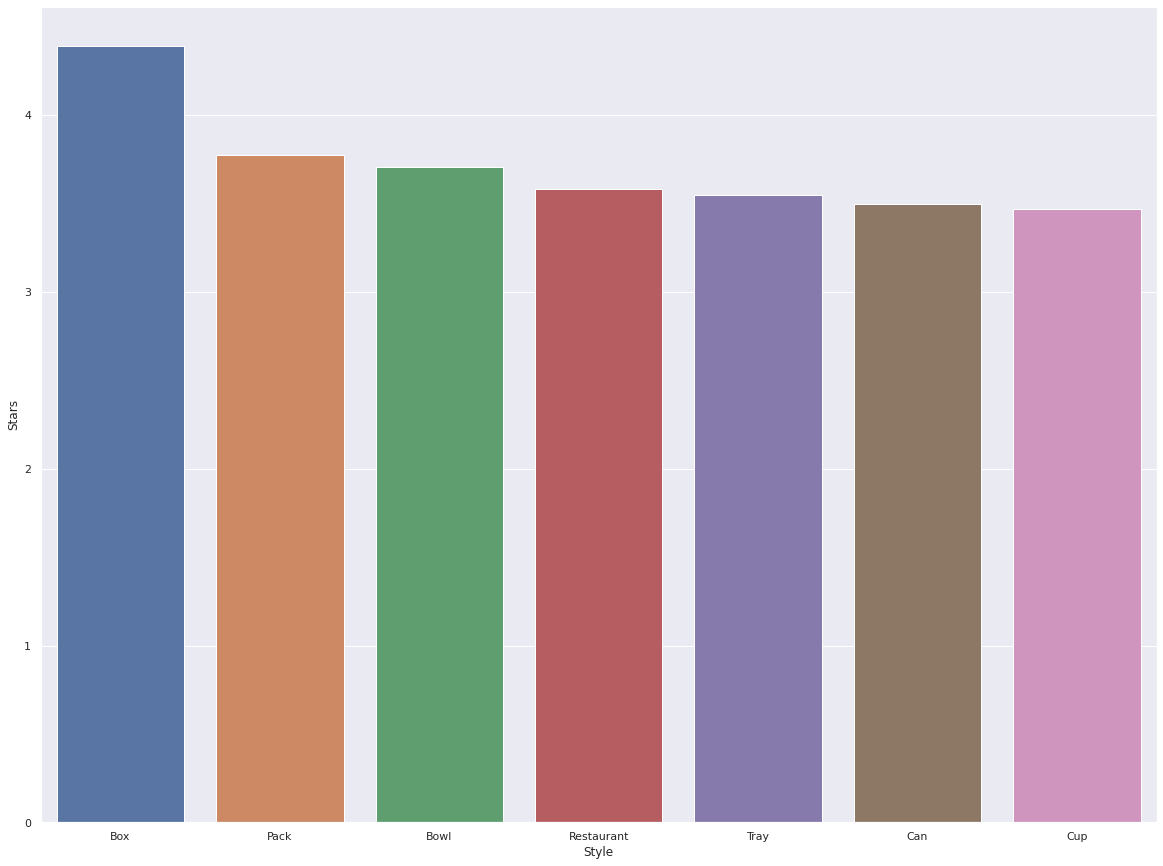

In [24]:
#plotting the styles and their avg rating in decending order
StyleStars = sns.barplot(x= 'Style', y= 'Stars', data = styleRatings, order=styleRatings.sort_values('Stars',ascending = False).Style)
sns.set(rc={'figure.figsize':(15,10)})

**Analysis and Results:**

After averaging out the ratings for each style of ramen, we discovered that the ramen style with the highest rating in stars is box-styled ramen, with an average rating of 4.39 stars. Following pack-styled ramen in descending order of popularity, the other styles were bowl, restaurant, tray, can, and cup. All the averaged ratings were relatively the same, so style of ramen does not contribute very much to the rating of a ramen product.

**Brand VS Stars**

Seeing what brands has the highest average star ratings

In [25]:
#Brand vs Stars
#keep brands that has more than 5 types of ramen
df['countBrand'] = df.groupby('Brand')['Brand'].transform('count')
df = df[df['countBrand']> 5]

#create a new df store brand and their avg rating
countries = df.groupby("Brand")
avgStars = countries['Stars'].agg(np.mean)
starsArr = avgStars.array

#make a new df to store the brand and their avg rating
starDf = pd.DataFrame(starsArr)
brandRatings = pd.DataFrame(sorted(df['Brand'].unique()), columns=['Brand'])
brandRatings['Stars'] = starDf
brandRatings.head()

Brand     Stars
0             A-Sha  4.525000
1  A-Sha Dry Noodle  4.076923
2               ABC  4.214286
3           Acecook  3.214286
4            Alhami  3.892857

In [26]:
#First 50 brands with highest ratings
topBrandStar = brandRatings.head(50)

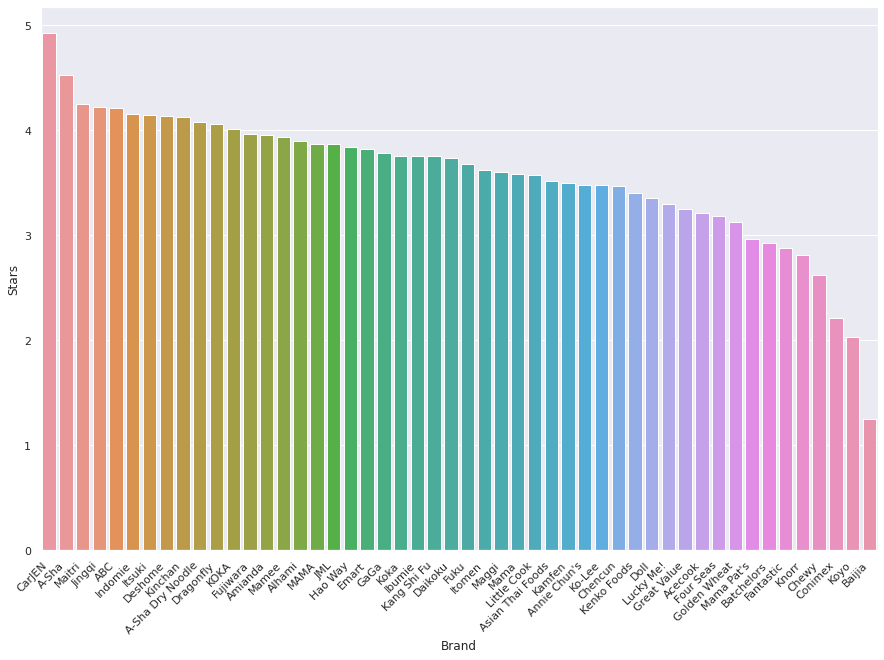

In [27]:
#plotting the brand and their avg rating in decending order
BrandStars = sns.barplot(x= 'Brand', y= 'Stars', data = topBrandStar, order=topBrandStar.sort_values('Stars',ascending = False).Brand)
BrandStars.set_xticklabels(BrandStars.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.set(rc={'figure.figsize':(20,15)})

After averaging out the stars of each brand of ramen, we discovered that the ramen brand with the highest rating in stars was CarJEN ramen from Malaysia, with an average rating of 4.93 stars. Following CarJEN in order of brand popularity, there is A-SHA, Maitri, Jingqi, etc.. We only displayed the Top 50 ramen brands for readability. These Top 50 brands were relatively close in terms of ratings, with some ratings differing by only a few decimal places.

# Ethics & Privacy

With the data that we have proposed, there is the issue of having a big bias, as it only takes into account the opinion of ramen from one person, rating them to their preference. Going into more of the specifics the data composed was by a white man which can exclude different groups of ethnicities and genders. Because the ratings are made by a white man the ratings may not hold as much true value as if the ratings were done by someone that has some Asian background as ramen is authentic mostly to the Asian community. Another issue that could possibly cause a problem would be the consequence of people not eating brands that have lower ratings, causing them to probably go out of business. The data collected isn’t up to date as it was last updated more than a year ago, must be updated at least every year in order for ratings to be accurate for the current year.

# Conclusion & Discussion

In our project, we wanted to find the factors that affected the popularity of instant ramen brands/companies. We initially predicted that spicy instant ramen packs from Japan would have the highest rating amongst all ramen brands/styles. Although our conclusion didn’t align with our hypothesis since the country with the highest rating in stars (4.185) was actually from Malaysia, it still follows our other prediction that the more popular ramen brands would come from Asian countries; this can be seen from the fact that the top five highest rated countries for ramen are all from Asian countries.

However, we did face some limitations during our project; one being that we only relied on only one dataset to do all our data analysis on since there was no other ramen rating dataset available to us. This can be a source of bias since ramen ratings are purely subjective to the person eating and trying the ramen; every person has different preferences for flavor, spiciness, type of ramen, etc..

While this may not have a large impact on society as a whole, for the college student and young working population, these may be potentially important findings. These findings give insight into the best brands, flavors, and styles of ramen, allowing these populations to save coin in their pursuits of finding the most satisfying ramen and getting the best bang for their buck. In addition to this, our findings give some insight about marketing techniques used for instant ramen brands, especially when it comes to product naming. Understanding marketing techniques for one product, such as ramen, may also be applied to other food products. This helps us better recognize contributing factors to popular foods and brands.


# Team Contributions

Background: Rainee, Lam

Hypothesis: Alan, Rainee, Zihang, Lam, Carlos

Finding Dataset(s): Alan

Cleaning: Alan, Rainee, Zihang, Lam 

Data Visualization: Zihang, Lam, Carlos

Analysis: Lam, Rainee

Ethics and Privacy: Carlos 

